In [1]:
import mask_cam as mc
import data.data_processor as dp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tsfel
import seaborn as sns

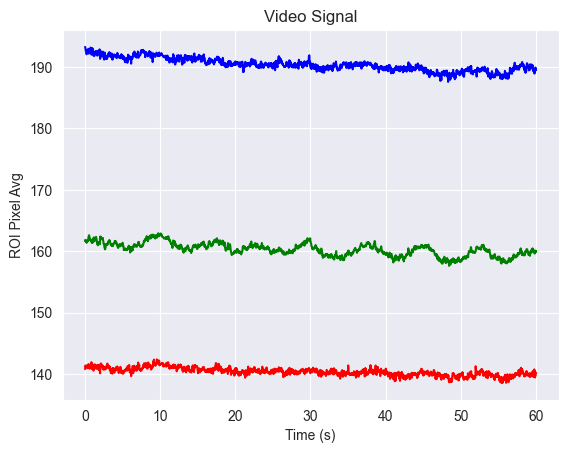

In [2]:
video_sample = "C:/Users/PC/PycharmProjects/ProjectPPG/src/data/Video-Samples/video1_v.mov"

r_signal, g_signal, b_signal, time, fps = mc.video_processing(video_sample)

plt.figure()
plt.title('Video Signal')
plt.plot(time, g_signal, label='Green', c='green')
plt.plot(time, r_signal, label='Red', c='red')
plt.plot(time, b_signal, label='Blue', c='blue')
plt.xlabel('Time (s)')
plt.ylabel('ROI Pixel Avg')
plt.show()

In [3]:
signal_red = dp.data_process(r_signal)
signal_green = dp.data_process(g_signal)
signal_blue = dp.data_process(b_signal)

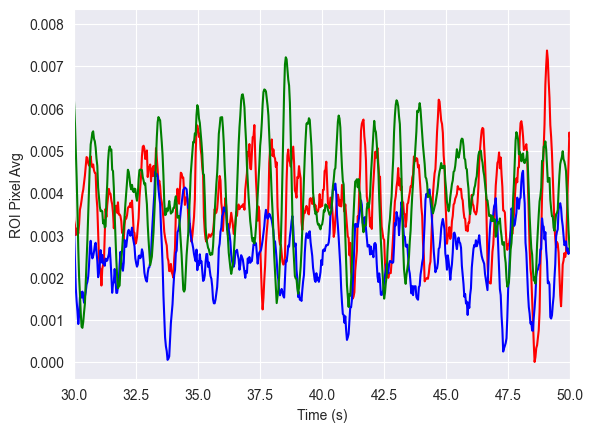

In [4]:
plt.figure()
plt.xlabel('Time (s)')
plt.ylabel('ROI Pixel Avg')
plt.plot(time, signal_red, color = 'red')
plt.plot(time, signal_blue, color = 'blue')
plt.plot(time, signal_green, color = 'green')
plt.xlim(30, 50)
plt.show()

In [5]:
from window_slider import Slider
 
def sliding_window(signal, window_size, overlap):

    slider = Slider(window_size,overlap)
    slider.fit(signal) 
    window_data =[]
    while True:
        window_data.append(slider.slide())
        if slider.reached_end_of_list(): 
            break
    return window_data

   
def tsfel_features_max(signal, window_size, overlap):
    windows = sliding_window(signal, window_size, overlap)
    feature_values = []
    for window in windows:
        value = tsfel.calc_max(window)
        feature_values.append(value)
    return feature_values


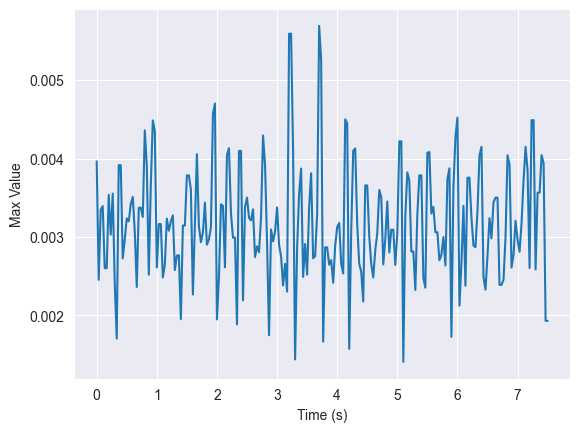

In [6]:
max_red = tsfel_features_max(signal_red,10,2)
max_green = tsfel_features_max(signal_green,10,2)
max_blue = tsfel_features_max(signal_blue,10,2)

time = np.arange(0, len(max_blue)/fps, 1/fps)/6

plt.figure()
plt.xlabel('Time (s)')
plt.ylabel('Max Value')
plt.plot(time, max_blue)
plt.show()

In [7]:
def tsfel_features_pk_to_pk(signal, window_size, overlap):
    windows = sliding_window(signal, window_size, overlap)
    feature_values = []
    for window in windows:
        value = tsfel.pk_pk_distance(window)
        feature_values.append(value)
    return feature_values

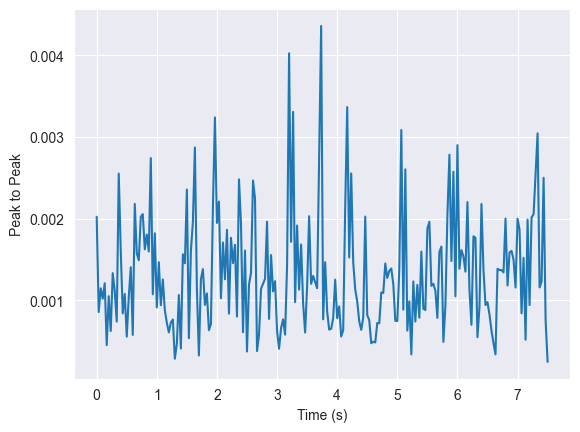

In [8]:
pk_red = tsfel_features_pk_to_pk(signal_red,10,2)
pk_green = tsfel_features_pk_to_pk(signal_green,10,2)
pk_blue = tsfel_features_pk_to_pk(signal_blue,10,2)

time = np.arange(0, len(pk_blue)/fps, 1/fps)/6

plt.figure()
plt.xlabel('Time (s)')
plt.ylabel('Peak to Peak')
plt.plot(time, pk_blue)
plt.show()

In [9]:
def tsfel_features_avg_power(signal, window_size, overlap,fs):
    windows = sliding_window(signal, window_size, overlap)
    feature_values = []
    for window in windows:
        value = tsfel.average_power(window,fs)
        feature_values.append(value)
    return feature_values

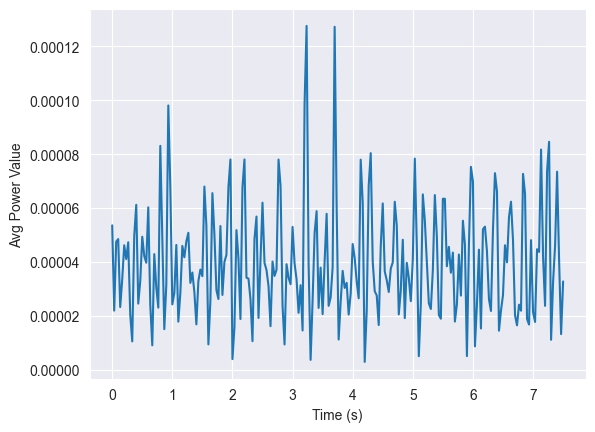

In [10]:
avg_red = tsfel_features_avg_power(signal_red, 10, 2, fps)
avg_green = tsfel_features_avg_power(signal_green, 10, 2, fps)
avg_blue = tsfel_features_avg_power(signal_blue, 10, 2, fps)

time = np.arange(0, len(avg_blue)/fps, 1/fps)/6

plt.figure()
plt.xlabel('Time (s)')
plt.ylabel('Avg Power Value')
plt.plot(time, avg_blue)
plt.show()

In [11]:
def tsfel_features_autocorr(signal, window_size, overlap):
    windows = sliding_window(signal, window_size, overlap)
    feature_values = []
    for window in windows:
        value = tsfel.autocorr(window)
        feature_values.append(value)
    return feature_values

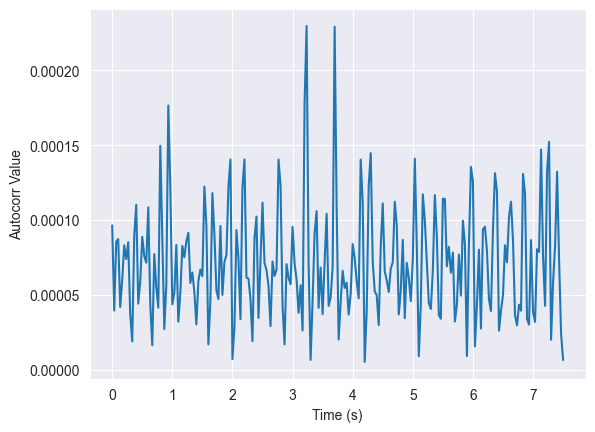

In [12]:
autocorr_red = tsfel_features_autocorr(signal_red,10,2)
autocorr_green = tsfel_features_autocorr(signal_green,10,2)
autocorr_blue = tsfel_features_autocorr(signal_blue,10,2)

time = np.arange(0, len(autocorr_blue)/fps, 1/fps)/6

plt.figure()
plt.xlabel('Time (s)')
plt.ylabel('Autocorr Value')
plt.plot(time, autocorr_blue)
plt.show()

In [13]:
def tsfel_features_std(signal, window_size, overlap):
    windows = sliding_window(signal, window_size, overlap)
    feature_values = []
    for window in windows:
        value = tsfel.calc_std(window)
        feature_values.append(value)
    return feature_values

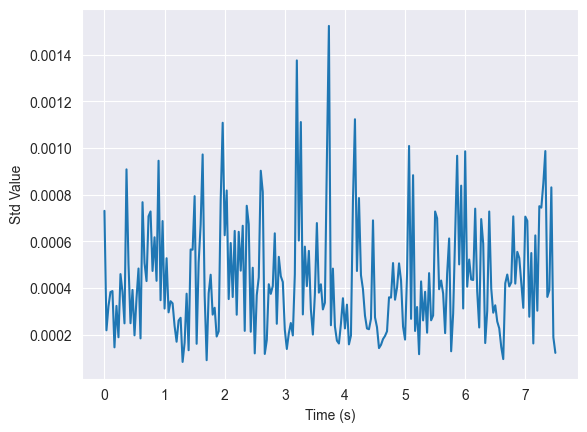

In [14]:
std_red = tsfel_features_std(signal_red,10,2)
std_green = tsfel_features_std(signal_green,10,2)
std_blue = tsfel_features_std(signal_blue,10,2)

time = np.arange(0, len(std_blue)/fps, 1/fps)/6

plt.figure()
plt.xlabel('Time (s)')
plt.ylabel('Std Value')
plt.plot(time, std_blue)
plt.show()

In [15]:
def tsfel_features_mean(signal, window_size, overlap):
    windows = sliding_window(signal, window_size, overlap)
    feature_values = []
    for window in windows:
        value = tsfel.calc_median(window)
        feature_values.append(value)
    return feature_values

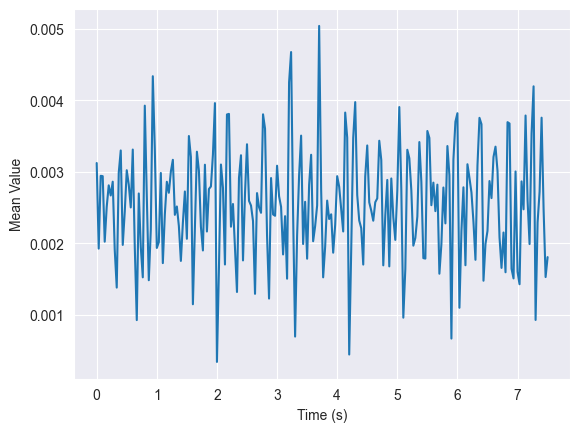

In [16]:
mean_red = tsfel_features_mean(signal_red,10,2)
mean_green = tsfel_features_mean(signal_green,10,2)
mean_blue = tsfel_features_mean(signal_blue,10,2)

time = np.arange(0, len(mean_blue)/fps, 1/fps)/6

plt.figure()
plt.xlabel('Time (s)')
plt.ylabel('Mean Value')
plt.plot(time, mean_blue)
plt.show()

In [17]:
df_red = pd.DataFrame()
df_green = pd.DataFrame()
df_blue = pd.DataFrame()

In [18]:
df_red["Max"] = max_red
df_red["Pk to Pk"] = pk_red
df_red["Avg Power"] = avg_red

df_green["Max"] = max_green
df_green["Pk to Pk"] = pk_green
df_green["Avg Power"] = avg_green

df_blue["Max"] = max_blue
df_blue["Pk to Pk"] = pk_blue
df_blue["Avg Power"] = avg_blue

df = pd.concat([df_blue,df_red,df_green], keys=['Blue','Red','Green'])
df = df.reset_index()
df = df.drop('level_1', axis = 1)
df.columns = ['Color', 'Max', 'Pk to Pk', 'Avg Power']
df

,Color,Max,Pk to Pk,Avg Power
0,Blue,0.003964,0.002022,0.000054
1,Blue,0.002452,0.000855,0.000022
2,Blue,0.003345,0.001146,0.000048
3,Blue,0.003393,0.001019,0.000049
4,Blue,0.002602,0.001208,0.000023
...,...,...,...,...
673,Green,0.005046,0.002832,0.000065
674,Green,0.005388,0.003138,0.000081
675,Green,0.005797,0.001586,0.000154
676,Green,0.004571,0.001370,0.000075


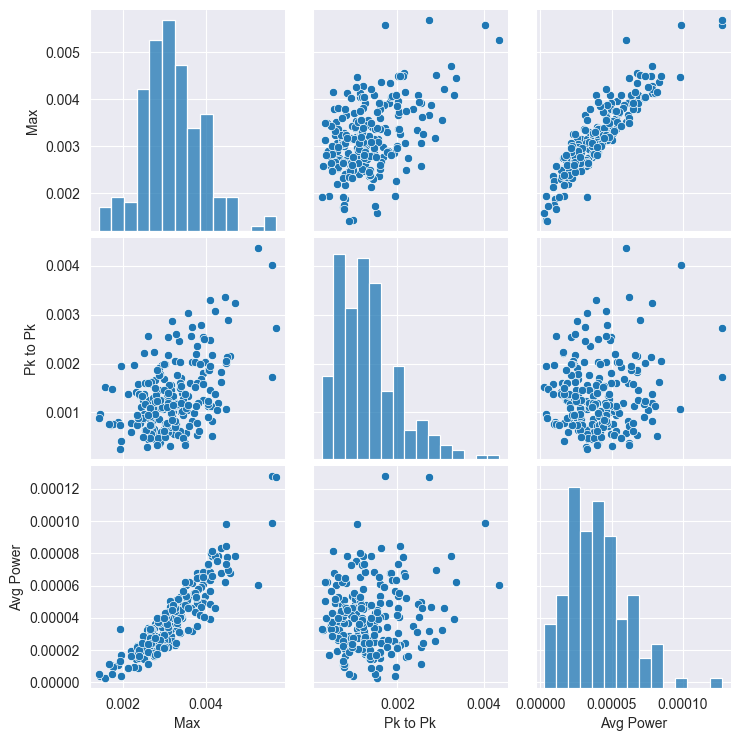

In [19]:
sns.pairplot(df_blue)

In [20]:
df_blue2 = pd.DataFrame()

df_blue2["Autocorr"] = autocorr_blue
df_blue2["Std"] = std_blue
df_blue2["Mean"] = mean_blue

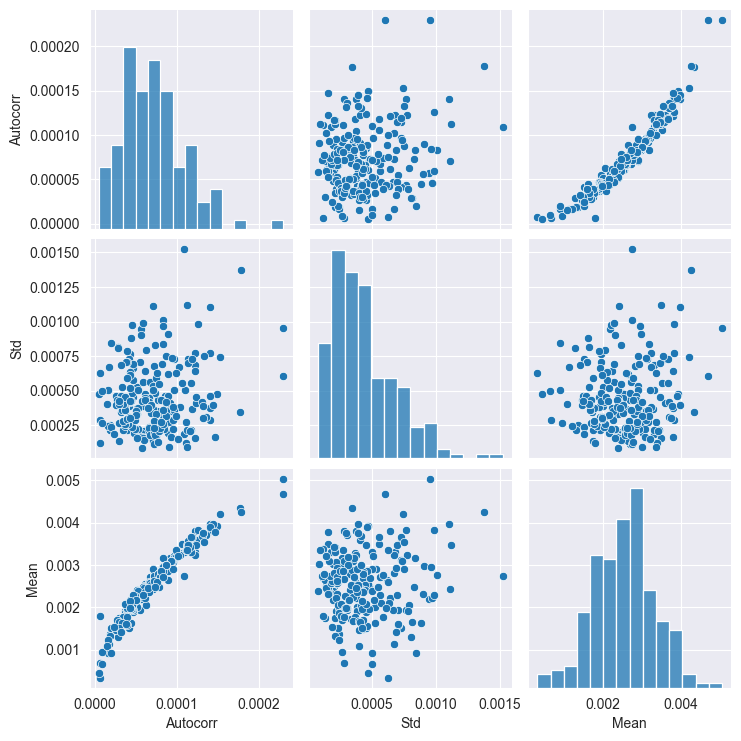

In [21]:
sns.pairplot(df_blue2)